In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import json

%matplotlib inline

country_geo = r'/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/geoJSON_us_regions.txt'

path=r'/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df.3.csv'
print(path)
df=pd.read_csv(path, index_col=False)

/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df.3.csv


In [2]:
df= df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,age,sex,bmi,number_of_children,smoker,region,annual_insurance_cost,cost_category,age_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,High Cost,young adulthood,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Low Cost,young adulthood,obesity
2,28,male,33.000,3,no,southeast,4449.46200,Low Cost,young adulthood,obesity
3,33,male,22.705,0,no,northwest,21984.47061,High Cost,middle age adulthood,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,Low Cost,middle age adulthood,overweight


In [9]:
subset = df[['bmi', 'annual_insurance_cost', 'age', 'number_of_children']]

# Elbow Technique

In [4]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/jessicagiron/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jessicagiron/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jessicagiron/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jessicagiron/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-195939158682.99283,
 -47969960260.47191,
 -22939341769.035553,
 -12119109628.751936,
 -8534185334.338442,
 -6164546464.633282,
 -4433950614.89393,
 -3493642480.709547,
 -2779599651.9565454]

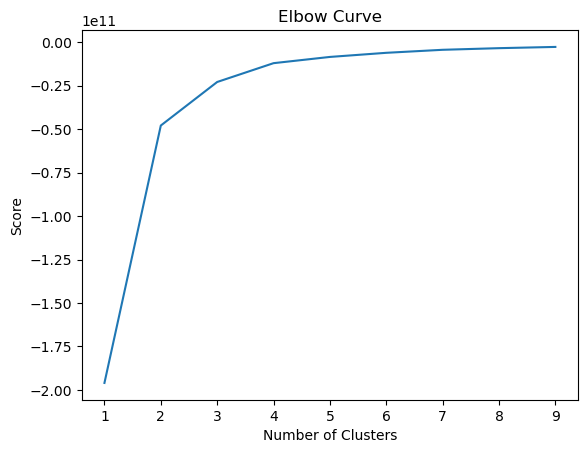

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [12]:
#the optimal cluster count is 4 because there is a large jump from the 2 to 4 axis, after then the curve straightens out

# K-mean clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

# Fit the k-means object to the data

kmeans.fit(subset)

/Users/jessicagiron/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
subset['clusters'] = kmeans.fit_predict(subset)

/Users/jessicagiron/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/w4/gggschwn6vl43xxxrphzmdt40000gn/T/ipykernel_93063/100664328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['clusters'] = kmeans.fit_predict(subset)


In [15]:
subset.head()

,bmi,annual_insurance_cost,age,number_of_children,clusters
0,27.900,16884.92400,19,0,3
1,33.770,1725.55230,18,1,0
2,33.000,4449.46200,28,3,0
3,22.705,21984.47061,33,0,1
4,28.880,3866.85520,32,0,0


In [17]:
subset['clusters'].value_counts()

0    563
3    443
1    176
2    155
Name: clusters, dtype: int64

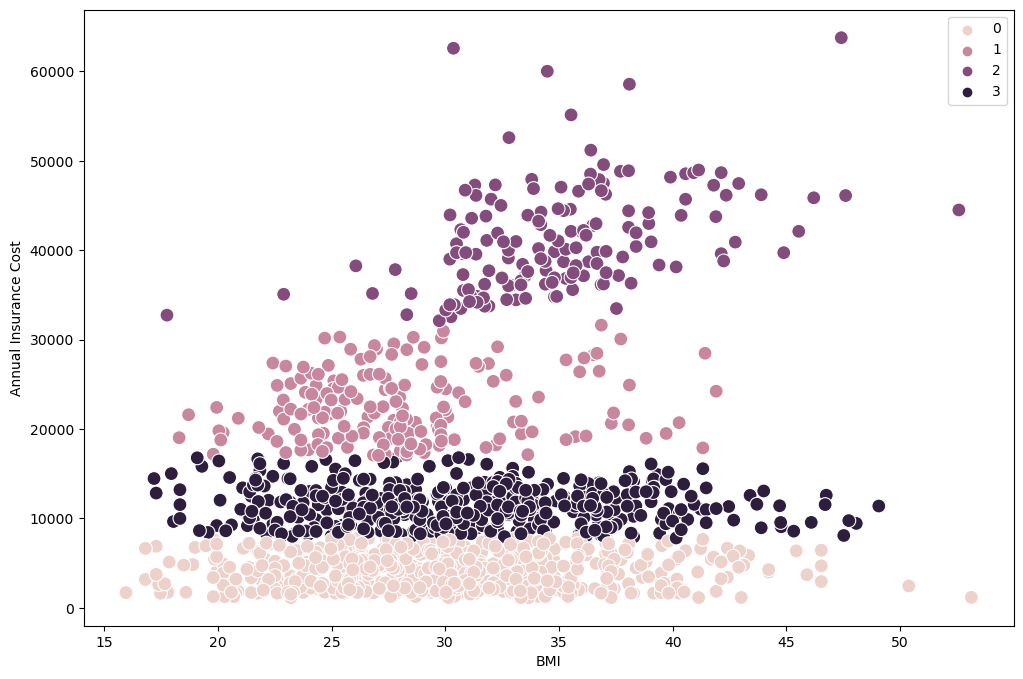

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['bmi'], y=subset['annual_insurance_cost'], hue=kmeans.labels_, s=100) 
# Here, I am subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('BMI') # Label x-axis.
plt.ylabel('Annual Insurance Cost') # Label y-axis.
plt.show()

In [34]:
#There is a slight trend in which if the bmi is higher then the cost is higher. This is logical because a high bmi is correlated with more health issues.

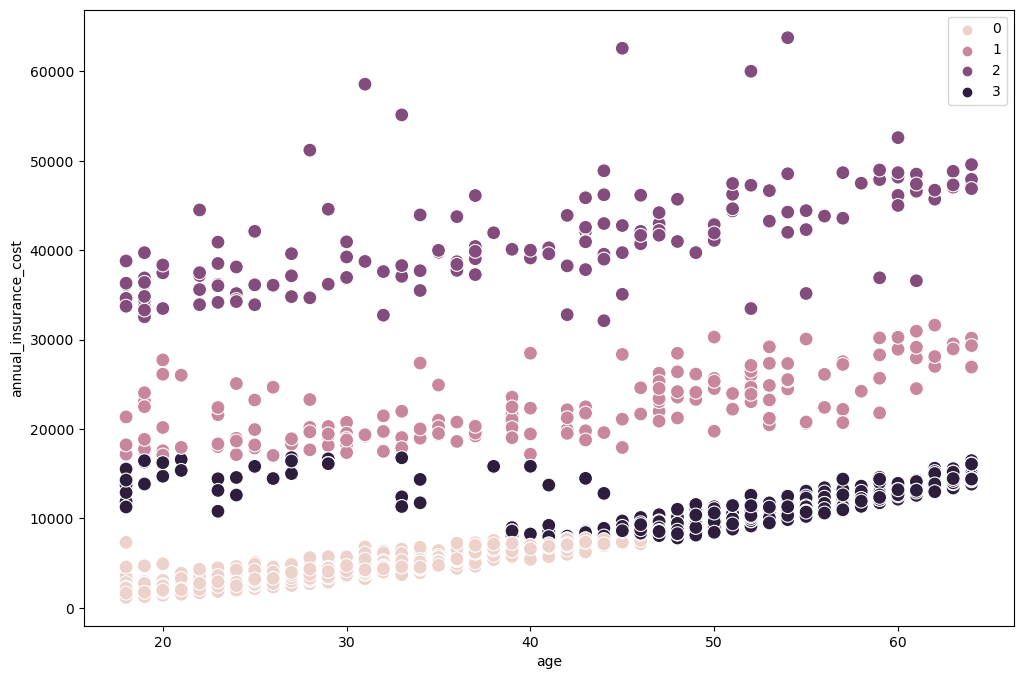

In [27]:
# Plot the clusters for the "Age" and "Annual_insurance_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['age'], y=subset['annual_insurance_cost'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('age') 
plt.ylabel('annual_insurance_cost') 
plt.show()

In [35]:
#the trend is not as clear. but the older one is the more they pay. There is very weak correlation for this trend

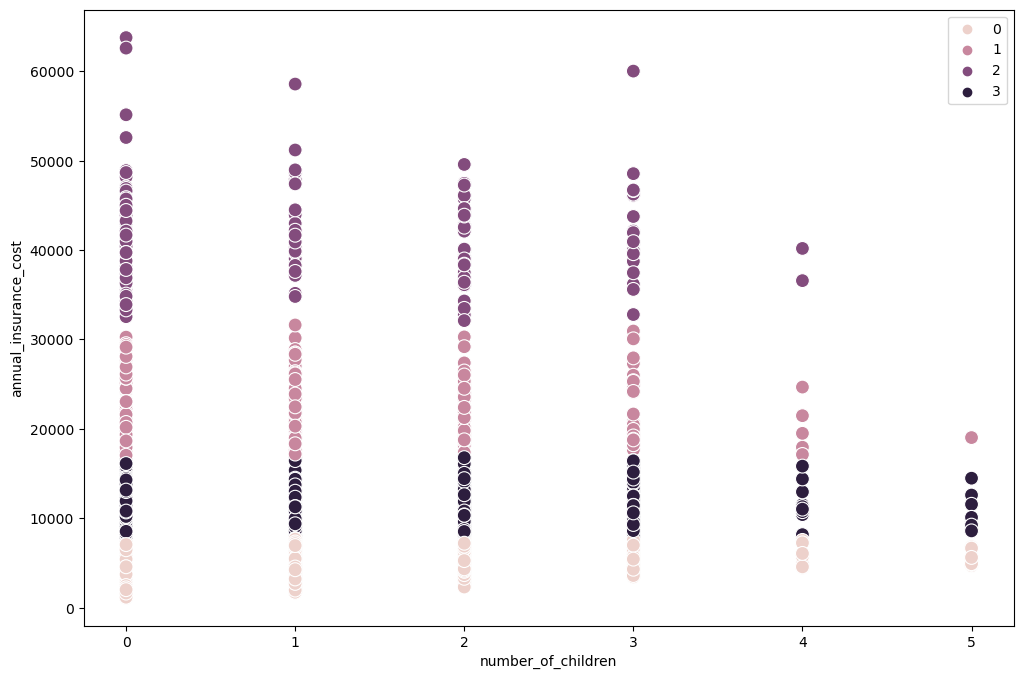

In [28]:
# Plot the clusters for the "number of children" and "Annual_insurance_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['number_of_children'], y=subset['annual_insurance_cost'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('number_of_children') 
plt.ylabel('annual_insurance_cost') 
plt.show()

In [36]:
#there is no trend because of the even distribution amongsts each group

In [33]:
subset.groupby('clusters').agg({'bmi':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'number_of_children':['mean', 'median'],
                          'annual_insurance_cost':['mean', 'median']})

bmi                 age        number_of_children         \
               mean   median       mean median               mean median   
clusters                                                                   
0         30.098295  29.8300  29.341030   29.0           1.010657    1.0   
1         28.165114  27.6225  41.051136   42.5           1.221591    1.0   
2         35.045000  34.8000  39.548387   40.0           1.135484    1.0   
3         30.841219  30.7800  50.939052   53.0           1.139955    1.0   

         annual_insurance_cost                
                          mean        median  
clusters                                      
0                  4237.478862   4189.113100  
1                 22525.020416  21785.661275  
2                 41224.580772  40103.890000  
3                 11318.896650  11244.376900

This data is useful for grouping vairable together to analyze. For example the second cluster is indicatiing a higher bmi mean but similair age and children mean as the other cluster in respect to insurance cost. The age and children varaibles are very similair acrooss all clusters.
the relationship between bmi and cost should be further investigated 